In [45]:
import pandas as pd
import numpy as np
import glob
import os
import librosa
from pydub import AudioSegment
import pydub
import matplotlib.pyplot as plt
import random
from typing import List

In [46]:
path='../../data/train/asbfly/XC134896.ogg'

In [47]:
audio = AudioSegment.from_ogg(path)

print(audio)
print(type(audio))

# audio duration
duration_seconds=len(audio)/1000.0

print(duration_seconds)
# print(duration_seconds/60) # minutes

# sampling rate
sr=audio.frame_rate

print(sr)

# the num of channels
print(audio.channels)

# bit depth
bit_depth=audio.sample_width * 8

print(bit_depth)

<class 'pydub.audio_segment.AudioSegment'>
27.35
32000
1
32


In [48]:
# Set a new sampling rate, for example, change the sampling rate to 12Khz
new_sample_rate = 16000
audio = audio.set_frame_rate(new_sample_rate)

In [49]:
# Capture 5 seconds of audio
five_seconds_audio = audio[:5000]  # capture the first 5000ms

# the goal is to randomly extract a total of 2 seconds of audio
total_duration_ms = 2000

#Store the extracted fragments
extracted_segments = AudioSegment.silent(duration=0)  # Create a silent segment for subsequent splicing

# Continue looping when the total length of the extracted segments is less than 2 seconds
while extracted_segments.duration_seconds < 2:
    # Random choose a starting point
    start_ms = random.randint(0, len(five_seconds_audio) - 1)
    # Calculate the maximum duration that can be extracted
    max_extract_ms = total_duration_ms - int(extracted_segments.duration_seconds * 1000)
    # Random determine the duration of this draw
    extract_duration_ms = random.randint(1, max_extract_ms)

    extract = five_seconds_audio[start_ms:start_ms+extract_duration_ms]

    extracted_segments += extract


random_two_seconds = extracted_segments


# play(random_two_seconds)


# random_two_seconds.export("random_two_seconds.ogg", format="ogg")

In [50]:
random_two_seconds

In [51]:
# convert audio to numpy array
samples = np.array(random_two_seconds.get_array_of_samples())

In [52]:
# normalization

slice_0_2sec_arr=samples / float(2**(bit_depth-1))

In [53]:
slice_0_2sec_arr

print(len(slice_0_2sec_arr))

32000


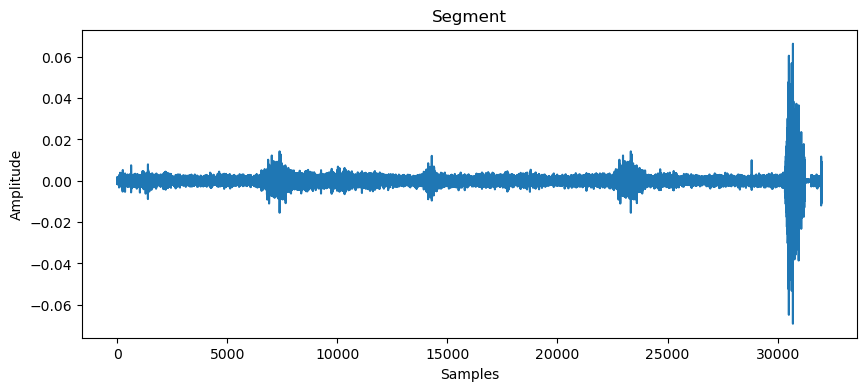

In [54]:
plt.figure(figsize=(10, 4))
plt.plot(slice_0_2sec_arr)
plt.title(f'Segment')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

Text(0, 0.5, 'Magnitude')

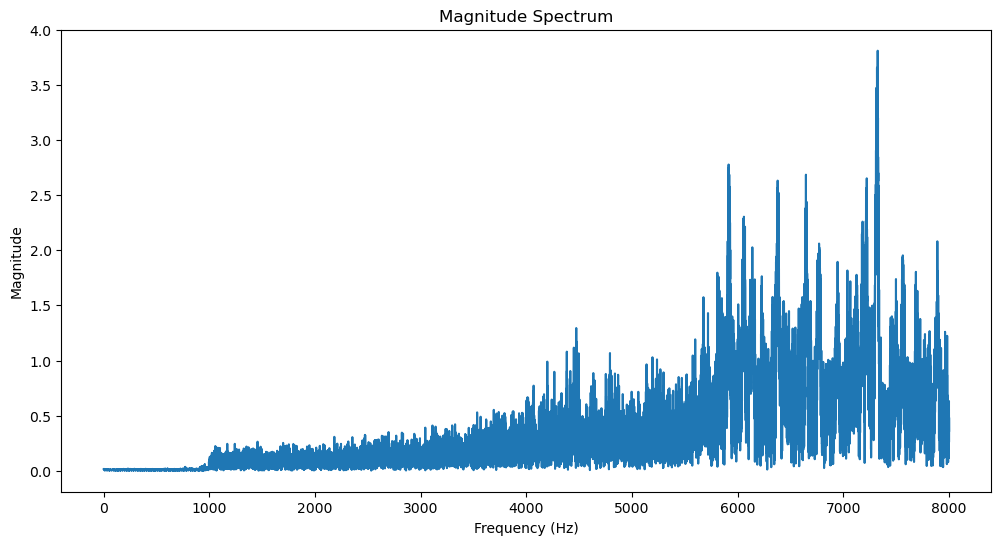

In [56]:
fft = np.fft.fft(slice_0_2sec_arr)
magnitude = np.abs(fft)
frequency = np.linspace(0, new_sample_rate, len(magnitude))


half_len = len(magnitude) // 2 
plt.figure(figsize=(12, 6))
plt.plot(frequency[:half_len], magnitude[:half_len])
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')